In [13]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import datetime
DATA_PATH = "Results_benchmarks3\Sorted_Results8_Shards1_06-02-2022_23-17-05.txt.csv"
DATA_PATH2 = "Results_benchmarks3\Sorted_Results6_Shards2_06-02-2022_22-04-01.txt.csv"
DATA_PATH3 = "Results_benchmarks3\Sorted_Results7_Shards3_06-02-2022_22-38-15.txt.csv"

6720.340275132276
1546.3492961876836
1610.945349544073


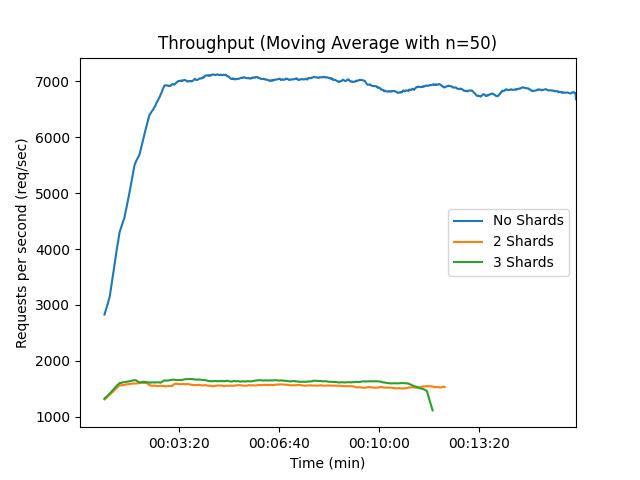

In [14]:

df: pd.DataFrame = pd.read_csv(DATA_PATH)
df_responses = df[df.action == "ReceivedResponse"]
df_responses = df_responses[["time","latency"]]
df_responses["time"] = pd.to_datetime(df_responses["time"])
# Start: 2022-02-06 22:00:28.762505
df_responses["time"] = df_responses["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,22,00,28,762505))
df_responses = df_responses.set_index("time")
seconds = df_responses.latency.resample("S").count()
seconds = seconds.rolling(50).mean()
print(seconds.mean())
ax = seconds.plot(label="No Shards")
ax.plot()

df: pd.DataFrame = pd.read_csv(DATA_PATH2)
df_responses = df[df.action == "ReceivedResponse"]
df_responses = df_responses[["time","latency"]]
df_responses["time"] = pd.to_datetime(df_responses["time"])
# Start: 2022-02-06 20:50:57.016553
df_responses["time"] = df_responses["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,20,50,57,16553))
df_responses = df_responses.set_index("time")
seconds = df_responses.latency.resample("S").count()
seconds = seconds.rolling(50).mean()
print(seconds.mean())
ax = seconds.plot(label="2 Shards")
ax.plot()

df: pd.DataFrame = pd.read_csv(DATA_PATH3)
df_responses = df[df.action == "ReceivedResponse"]
df_responses = df_responses[["time","latency"]]
df_responses["time"] = pd.to_datetime(df_responses["time"])
# Start: 2022-02-06 21:26:11.309608
df_responses["time"] = df_responses["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,21,26,11,309608))
df_responses = df_responses.set_index("time")
seconds = df_responses.latency.resample("S").count()
seconds = seconds.rolling(50).mean()
print(seconds.mean())
ax = seconds.plot(label="3 Shards",ylabel= "Requests per second (req/sec)", xlabel="Time (min)", title="Throughput (Moving Average with n=50)")
plt.legend(loc='center right')
plt.show()